# **IRIS SPECIES ANALYSIS**

<hr>

**by:**  José Max Barrios Lara

**Junior Data Scientist**

**Panamá**

## **Data Set Information:**

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.

This is an exceedingly simple domain.

This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.



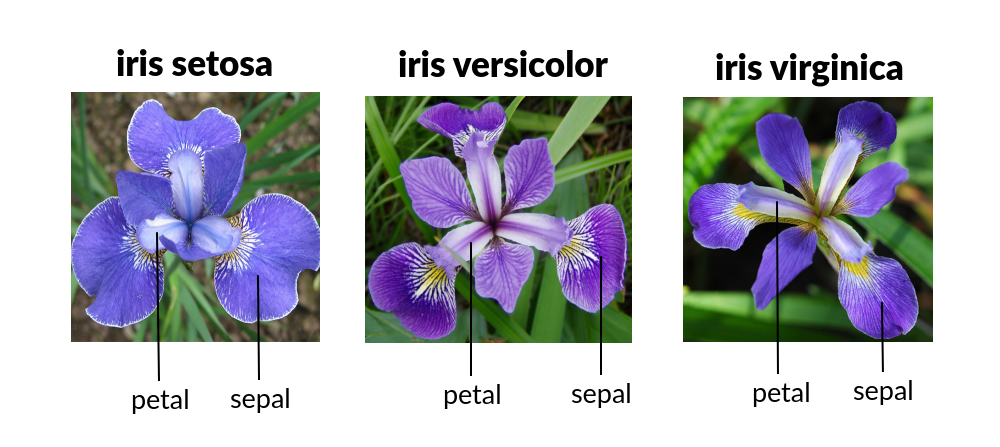




## Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica



In [1]:
#Uploading File from google colab.
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [2]:
#reading dataset and transforming it into panda´s dataframe.
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['iris.csv']))

In [3]:
#Importing sombre libraries to begin the analysis.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import scipy as sc

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#reading dataframe.
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#Removing the Id column, because we are not going to use.
df = df.drop(columns=['Id'])

### **Data Facts**

In [6]:
#Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


5 columns with numeric values and one column with data type object

In [7]:
#Some statistical info about the datset.
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## **Exploratory Data Analysis**

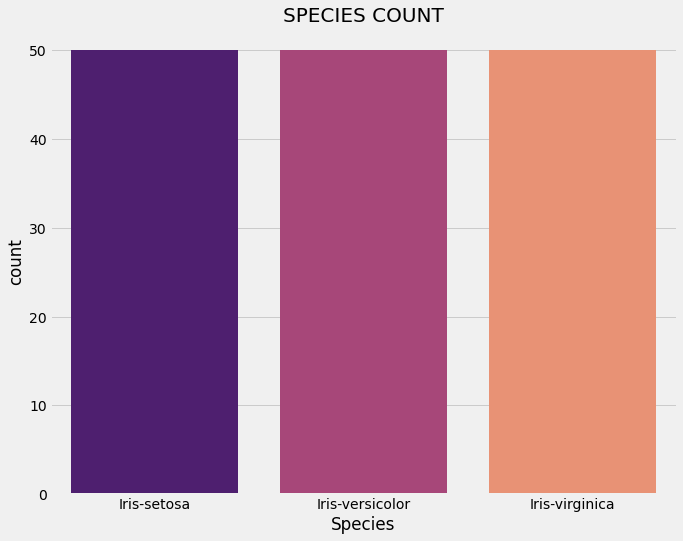

In [8]:
#Counting Species
plt.figure(figsize=(10,8))
plt.title('SPECIES COUNT', size=20)
sns.countplot(data=df, x='Species',palette='magma')

<Figure size 864x720 with 0 Axes>

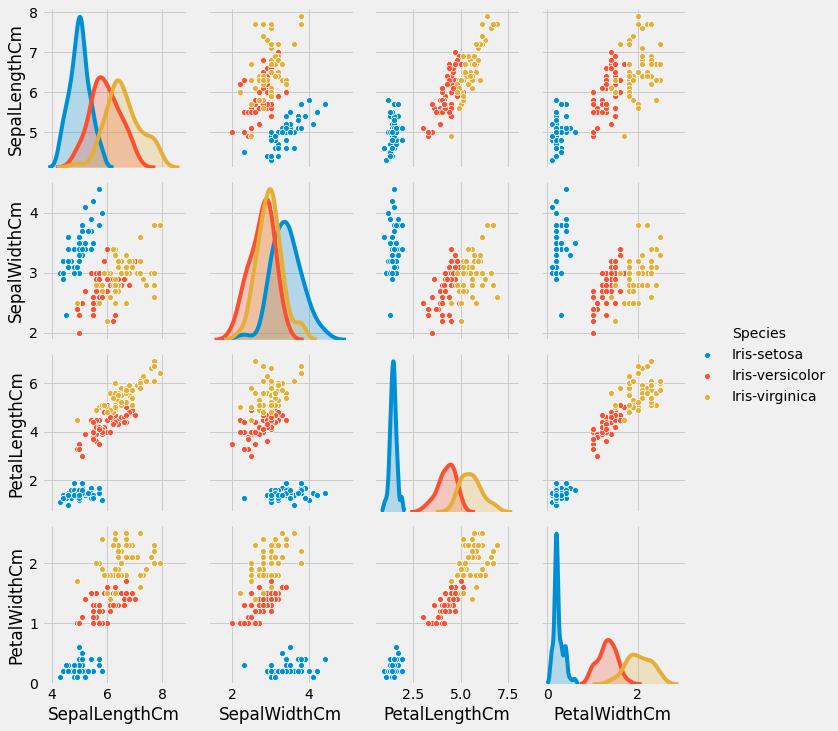

In [9]:
#Pairtplot
plt.figure(figsize=(12,10))
sns.pairplot(df,hue='Species')

## **Characteristic Distribution per Type of Iris**

In [10]:
#Creating three dataset for each species
virginica = df[df['Species']=='Iris-virginica']
setosa = df[df['Species']=='Iris-setosa']
versicolor = df[df['Species']=='Iris-versicolor']

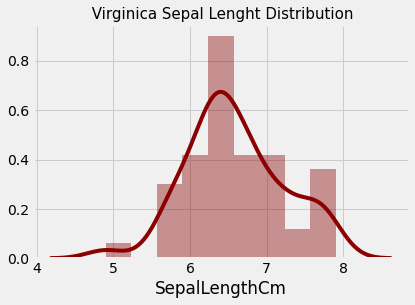

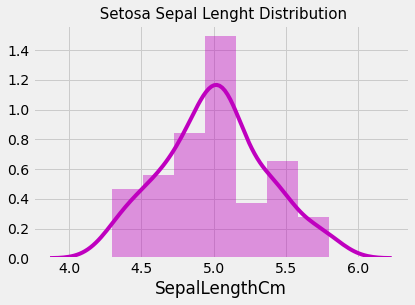

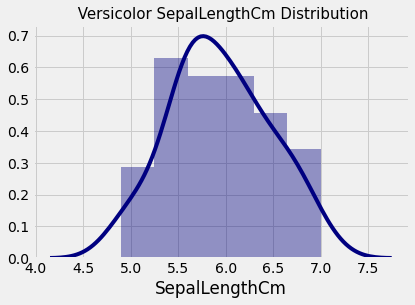

In [11]:
sns.distplot(virginica['SepalLengthCm'], color = 'darkred')
plt.title(' Virginica Sepal Lenght Distribution', fontsize = 15)
plt.show()

sns.distplot(setosa['SepalLengthCm'], color = 'm')
plt.title(' Setosa Sepal Lenght Distribution', fontsize = 15)
plt.show()

sns.distplot(versicolor['SepalLengthCm'], color = 'navy')
plt.title(' Versicolor SepalLengthCm Distribution', fontsize = 15)
plt.show()

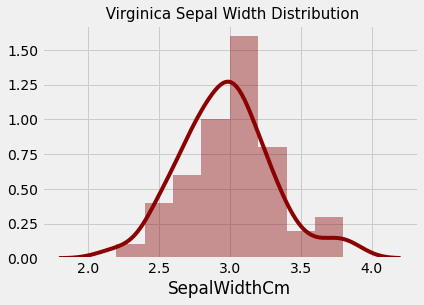

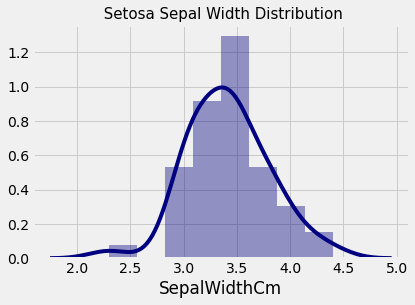

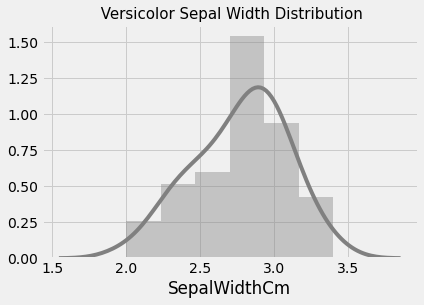

In [12]:
sns.distplot(virginica['SepalWidthCm'], color = 'darkred')
plt.title(' Virginica Sepal Width Distribution', fontsize = 15)
plt.show()

sns.distplot(setosa['SepalWidthCm'], color = 'navy')
plt.title(' Setosa Sepal Width Distribution', fontsize = 15)
plt.show()

sns.distplot(versicolor['SepalWidthCm'], color = 'gray')
plt.title(' Versicolor Sepal Width Distribution', fontsize = 15)
plt.show()

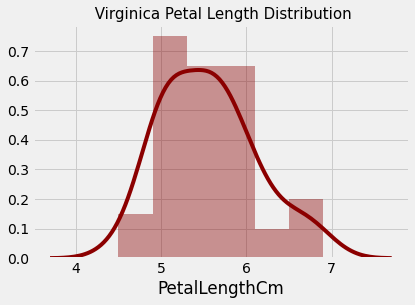

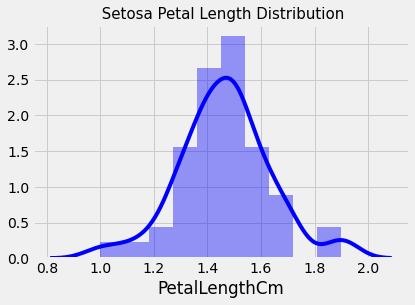

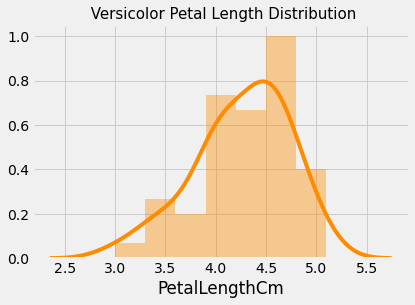

In [13]:
sns.distplot(virginica['PetalLengthCm'], color = 'darkred')
plt.title(' Virginica Petal Length Distribution', fontsize = 15)
plt.show()
sns.distplot(setosa['PetalLengthCm'], color = 'blue')
plt.title(' Setosa Petal Length Distribution', fontsize = 15)
plt.show()
sns.distplot(versicolor['PetalLengthCm'], color = 'darkorange')
plt.title(' Versicolor Petal Length Distribution', fontsize = 15)
plt.show()

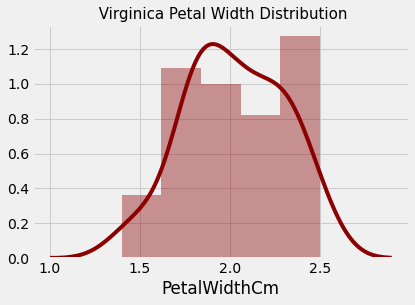

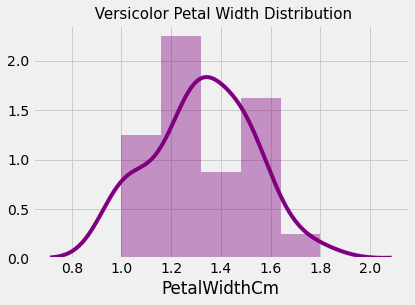

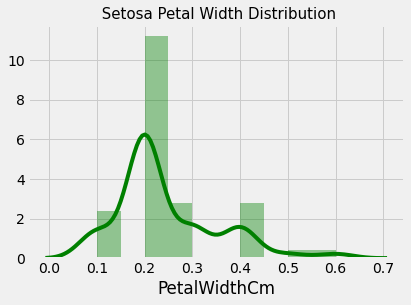

In [14]:
sns.distplot(virginica['PetalWidthCm'], color = 'darkred')
plt.title(' Virginica Petal Width Distribution', fontsize = 15)
plt.show()

sns.distplot(versicolor['PetalWidthCm'], color = 'purple')
plt.title(' Versicolor Petal Width Distribution', fontsize = 15)
plt.show()

sns.distplot(setosa['PetalWidthCm'], color = 'green')
plt.title(' Setosa Petal Width Distribution', fontsize = 15)
plt.show()

In [15]:
list_types=df['Species'].unique().tolist() # Convert the array of types into a list
list_types.sort() # Sorting the list of strings alphabeticall

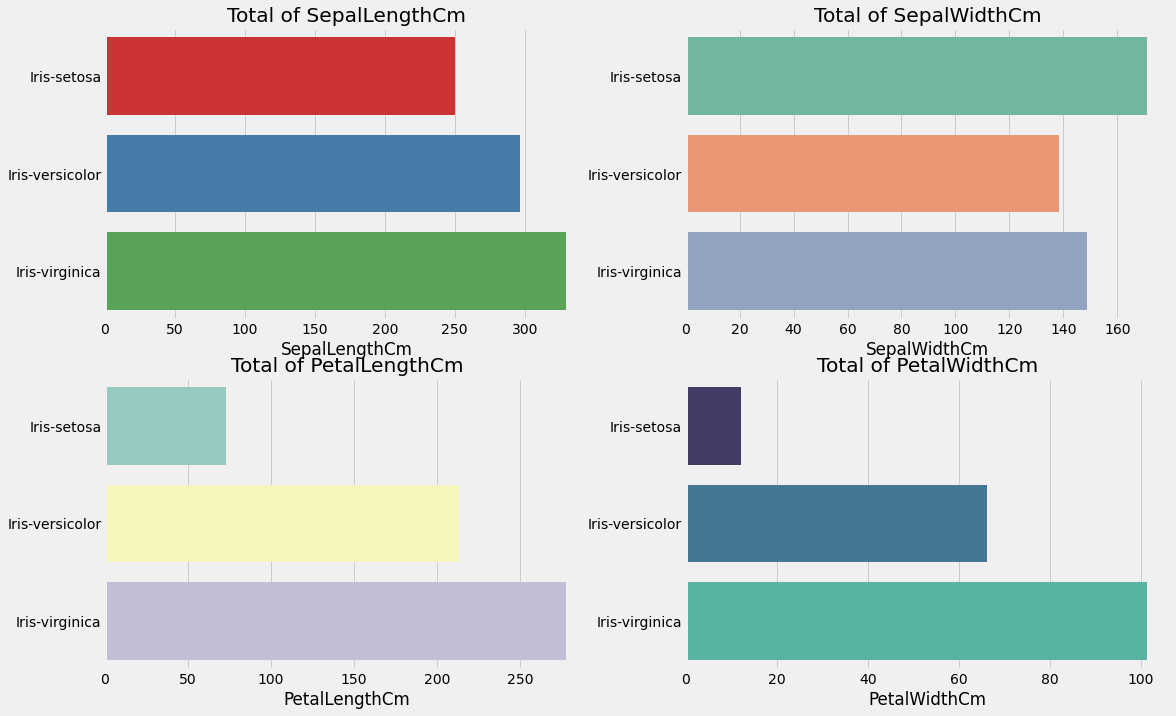

In [16]:
#Lets sum all the characteristics per type
stats=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
k=1
m=0
palette=['Set1','Set2','Set3','mako']
plt.figure(figsize=(17,17))
for i in stats:
    plt.subplot(3,2,k)
    k=k+1
    sns.barplot(x=df.groupby('Species').sum()[i],y=list_types,palette=palette[m])
    m=m+1
    plt.title(str('Total of '+i))
    plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


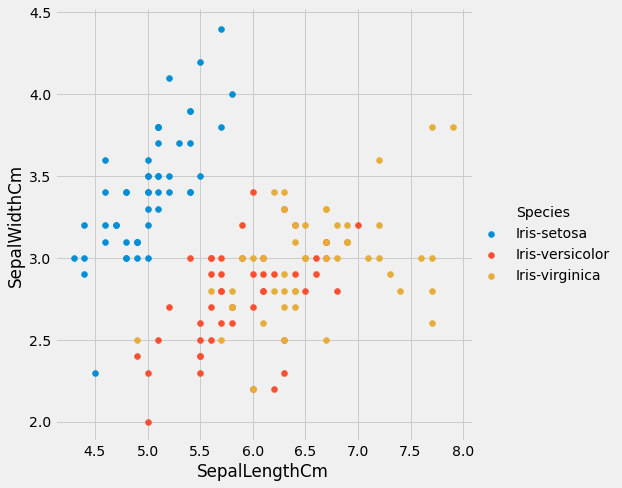

In [17]:
#Scatterplot comparing sepals for each class
sns.FacetGrid(df,hue='Species',size=7).map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


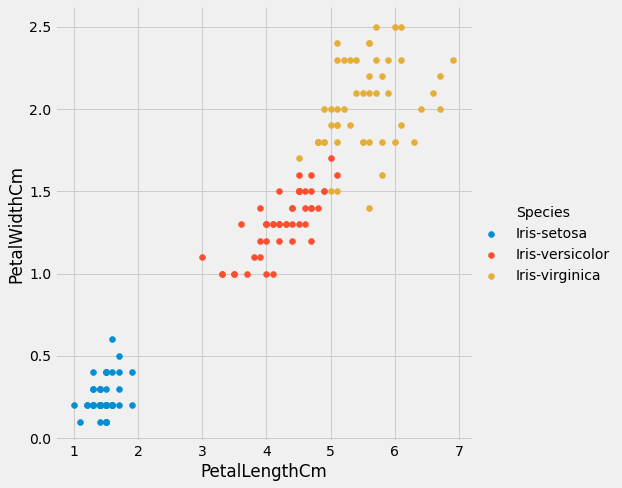

In [18]:
#Scatterplot comparing petals for each class
sns.FacetGrid(df,hue='Species',size=7).map(plt.scatter,'PetalLengthCm','PetalWidthCm').add_legend()

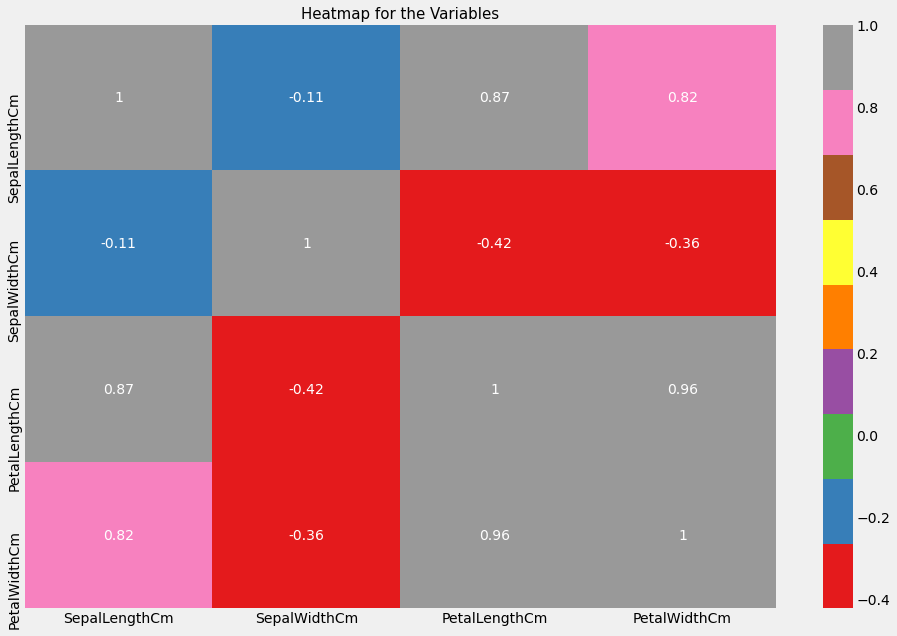

In [19]:
#Let´s see the correlation on a heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True, cmap = 'Set1',linecolor='black')
plt.title('Heatmap for the Variables', fontsize = 15)
plt.show()

Text(0, 0.5, 'Measure in cm')

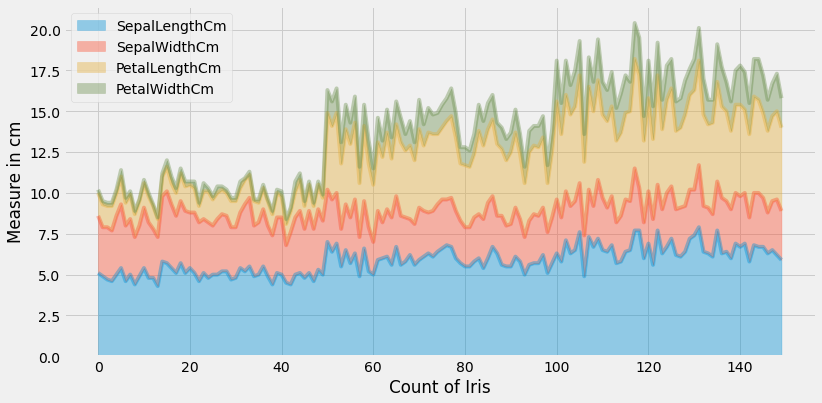

In [20]:
#Creating an area plot
df.plot.area(y=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],alpha=0.4,figsize=(12, 6));
plt.xlabel('Count of Iris')
plt.ylabel('Measure in cm')

Area Plot gives us a visual representation of Various dimensions of Iris flower and their range in dataset.

## **Machine Learning**

### **K-nearest Neighbor**


K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). 

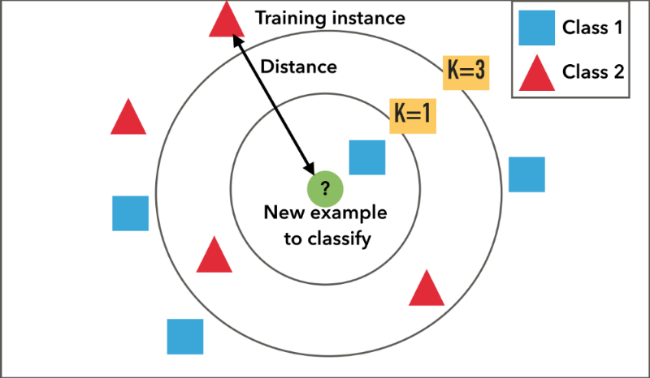

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [45]:
#Splitting Target Variable from the features
x = df.iloc[ : , :4]
y= df.iloc[: , -1]

In [46]:
#Train and test Splitting
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

In [48]:
#Normalizing values between range [-1,1]
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [71]:
#Fitting the model, and usimg 12 neighbors because is the square root of 150 (number of observations)
k_model = KNeighborsClassifier(n_neighbors=12)
k_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [72]:
#Predictiones from the Test set
y_predict = k_model.predict(X_test)

In [73]:
#Accuracy of the model
accuracy_score(y_test,y_predict)

0.9666666666666667

In [74]:
#Confussion Matrix
confusion_matrix(y_test,Y_predict)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  9]])

In [75]:
#Classification Report
print(classification_report(y_test, y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [76]:
from sklearn import metrics
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 29)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 1.0, 0.9, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333]


Text(0, 0.5, 'Testing Accuracy')

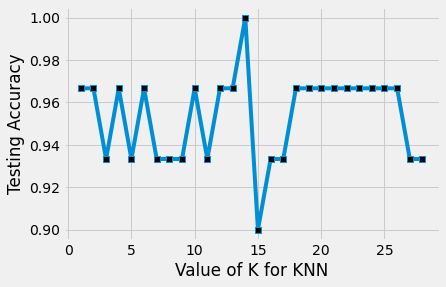

In [77]:
plt.plot(k_range, scores,marker='s',markerfacecolor='black')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Appartently 14 neighbors will give an accuracy of 100%, but maybe with this quantity of neighbors is biased, so let´s leave it with 12 neighbors.